<a href="https://colab.research.google.com/github/Bryan-Az/Agglomerative_Hierarchical_Clustering/blob/main/Clustering_CMPE256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single, Complete, and Average Link Cluster Methods

In [7]:
import numpy as np

In [8]:
# the data as given in the assignment
data_points = np.array([[3,7], [2,6], [5,8], [5,5], [6,6], [8,4], [7,3], [5,2], [2,2], [10,6], [12,8]])

In [9]:
data_points

array([[ 3,  7],
       [ 2,  6],
       [ 5,  8],
       [ 5,  5],
       [ 6,  6],
       [ 8,  4],
       [ 7,  3],
       [ 5,  2],
       [ 2,  2],
       [10,  6],
       [12,  8]])

# Single-Link Agglomerative Clustering

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

def plot_dendrogram(data, method):
    """
    Plot the dendrogram for a specific linkage method.
    """
    linked = linkage(data, method=method)
    dendrogram(linked, labels=range(data.shape[0]))
    plt.title(f'Dendrogram using {method}-link clustering')
    plt.show()
def plot_scatter(data, method, t):
    '''
    Perform single-link clustering
    '''
    linked = linkage(data, method=method)
    # Using the plot_dendogram information for t as a prior
    # Assign cluster labels based on a specific cut-off height on the dendrogram
    # You might need to adjust the 't' value depending on where you want to cut the dendrogram.
    cluster_labels = fcluster(linked, t=t, criterion='distance')

    # Plot clusters
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(np.unique(cluster_labels)):
        plt.scatter(data[cluster_labels == label, 0], data[cluster_labels == label, 1], label=f'Cluster {i+1}')

    plt.title('Clusters visualized on 2D scatter plot')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

## Dendogram Result
Given the information in the dendogram, the single link method of clustering has 2 major branches within which most datapoints fall into so t=2, anything higher would make all points fall into the same cluster.

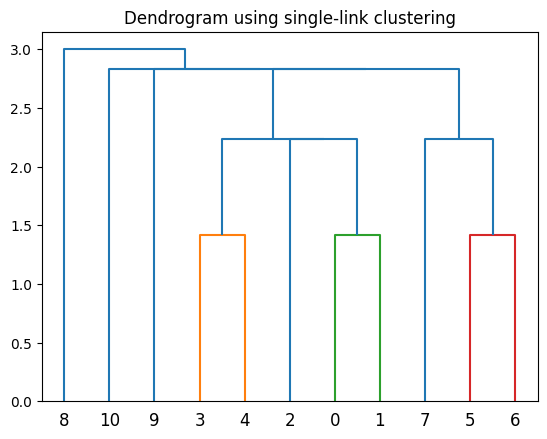

In [11]:
plot_dendrogram(data_points, 'single')

## Scatter Result
When setting t=2, the number of clusters produced is 8 in the visualization. This tells me that single-link clustering might be not as good as calculating the distances along multiple points in a cluster and agglomerating less than the other methods.

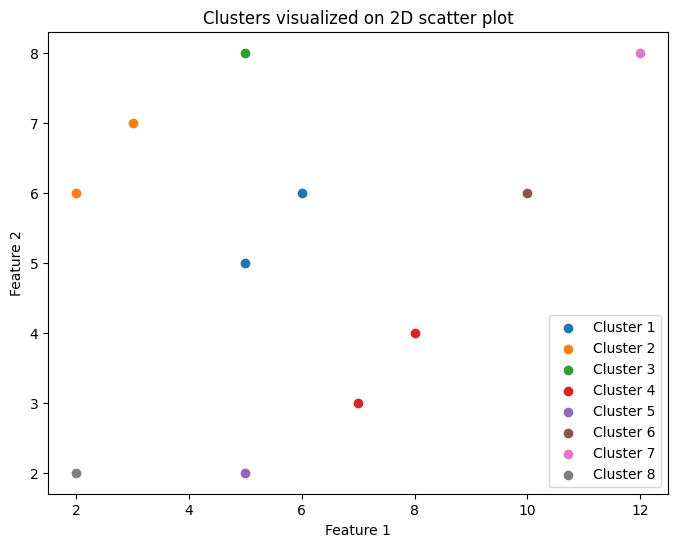

In [26]:
plot_scatter(data=data_points, method='single', t = 2)

# Complete-Link Agglomerative Clustering

## Dendogram Result
The visualization for the 'complete' method of linkage shows that there are at least 4 or 5 major branches that can cross along the horizontal line with the tallest vertical line (stemming on the far left), so I'll be setting t=5.

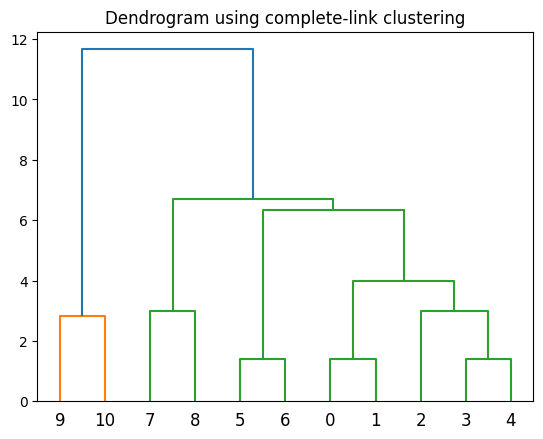

In [18]:
plot_dendrogram(data_points, 'complete')

## Scatter Result
The visualization of the clusters on a scatter plot show that for t=5, the number of clusters produced is equal to 4. This is 50% that of the single-link method, which implies that the complete method is able to agglomerate more and create bigger clusters.

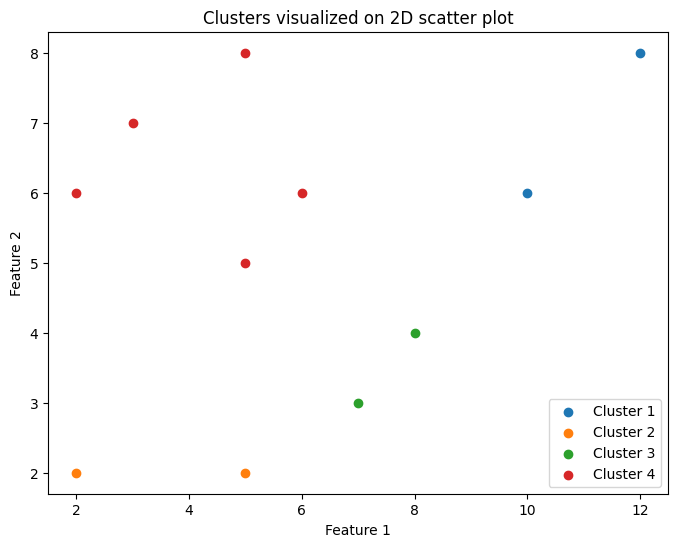

In [27]:
plot_scatter(data_points, 'complete', 5)

# Average-Link Agglomerative Clustering

## Dendogram Result
The information in the dendogram for the 'average-link' method of linkage, implies that the number of branches that can cross horizontally with the tallest branch on the far left is equal to 4 or 5, similar to the 'complete' method. In fact, the dendogram for the two look similar, and the only difference between them is that the 'complete-link' dendogram is taller, whereas the 'average-link' dendogram is about 50% shorter.

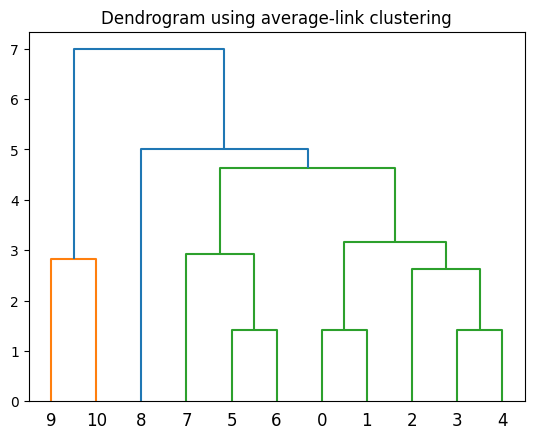

In [21]:
plot_dendrogram(data_points, 'average')

## Scatter Result
The visualization of the clusters after linkage is done shows that there are 3 clusters created. This is the smallest amount of clusters out of all the three methods! This may imply that the 'average-link' method is the most 'agglomerative' and including the most amount of points per cluster.

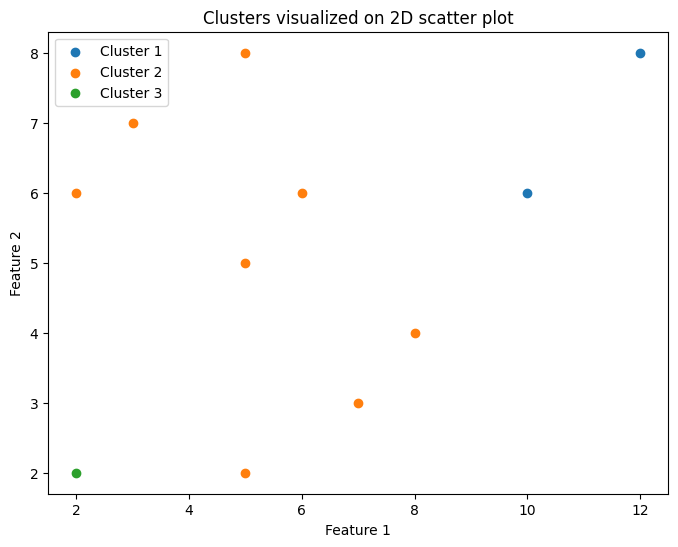

In [24]:
plot_scatter(data_points, 'average', 5)